In this notebook, taking another visual approach to do some EDA on the time_of_day feature.
I am looking at this after already having done a good deal of model training. Perhaps if I had looked at this histograms below earlier, I would have not necessarily chosen this particular feature binned as arbitrarily as I had done.

In [2]:
import pandas as pd
import numpy as np
import datetime; import pytz
from collections import Counter
import matplotlib.pyplot as plt
from joblib import dump, load
import joblib
import os
from tqdm import tqdm
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from scipy.stats import spearmanr
from functools import reduce
import fresh.s3utils as fs3
from importlib import reload
import json
import fresh.plot as fp
import fresh.vanilla_utils as fvu
import fresh.metrics as fm

import fresh.utils as fu


In [3]:
%matplotlib inline

In [4]:
# artifactsdir = '/opt/program/artifacts/2020-07-10T135910Z'
train_loc = 'artifacts/2020-07-08T143732Z/train.libsvm'

train_data = load_svmlight_file(train_loc)
X_train = train_data[0].toarray()
y_train = train_data[1]



In [5]:
X_train.shape, y_train.shape

((316281, 85), (316281,))

In [6]:
# just quickly plot which source more common... 
X_source_neighborhood = np.argmax(X_train[:, :75], axis=1)

X_time_of_day = np.argmax(X_train[:, 78:83], axis=1)
X_weekday = X_train[:, 84]

In [7]:

Counter(X_weekday)

Counter({1.0: 235318, 0.0: 80963})

In [8]:
Counter(X_time_of_day)

Counter({3: 115473, 2: 57914, 0: 54094, 1: 61246, 4: 27554})

In [9]:
X_time_of_day.shape, y_train.shape

((316281,), (316281,))

In [10]:
Counter(y_train)

Counter({10.0: 6160,
         42.0: 6751,
         29.0: 8736,
         8.0: 10565,
         2.0: 3271,
         46.0: 9515,
         45.0: 8231,
         30.0: 7301,
         18.0: 7416,
         0.0: 7881,
         38.0: 6291,
         48.0: 3656,
         5.0: 5320,
         22.0: 9432,
         20.0: 7298,
         32.0: 8739,
         35.0: 7740,
         43.0: 6399,
         9.0: 6654,
         16.0: 9370,
         23.0: 9414,
         53.0: 6583,
         52.0: 9295,
         34.0: 9082,
         4.0: 7233,
         1.0: 8395,
         36.0: 2666,
         21.0: 6957,
         6.0: 1927,
         25.0: 8607,
         14.0: 3873,
         26.0: 2726,
         24.0: 5802,
         40.0: 2200,
         3.0: 2521,
         37.0: 4234,
         19.0: 1637,
         50.0: 6287,
         49.0: 8115,
         11.0: 4921,
         33.0: 9555,
         7.0: 4008,
         12.0: 1375,
         17.0: 7319,
         31.0: 5034,
         39.0: 1536,
         41.0: 4302,
         15.0: 6963,
 

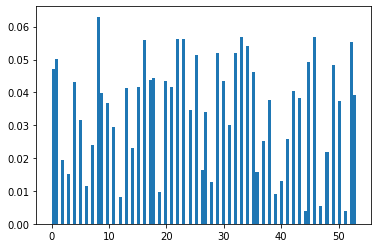

In [11]:
plt.hist(y_train, bins=100, density=True)
plt.show()

In [12]:
df = pd.DataFrame()
df['X_time_of_day'] = X_time_of_day
df['y_train'] = y_train
# y_train.shape

Here below, just sampling 10k , for the `5` different period of times of day, 
there looks to be a high regularity. These time periods were selected kind of arbitrarily and maybe there are other choices that perhaps highlight diffences better. But for these selections, visually they have limited distinction.

In [34]:
sample = np.random.choice(range(df.shape[0]), int(1e4))
df.iloc[sample].shape

(10000, 2)

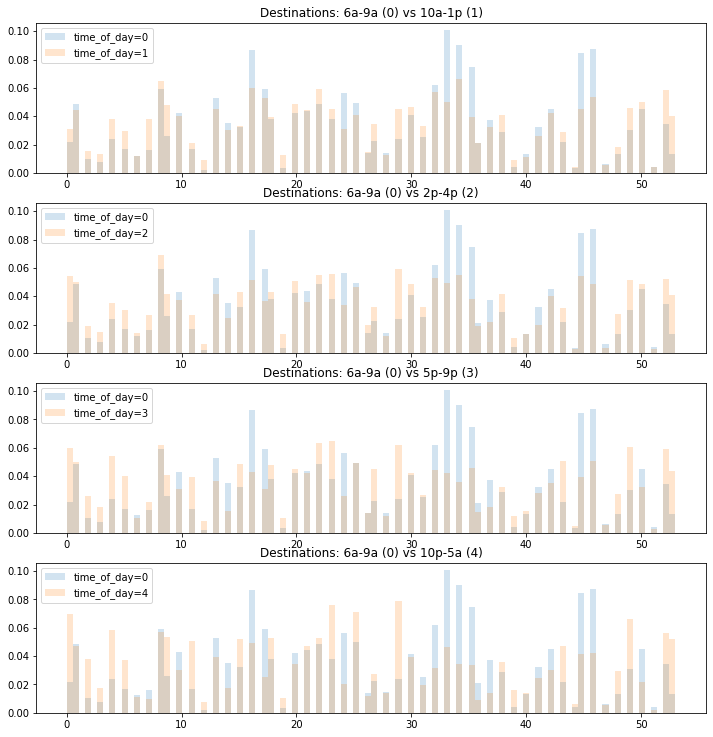

In [37]:
fig = plt.figure(figsize=(12, 16))
howmany = int(1e4)

def sample_foo(df, howmany):
    sample = np.random.choice(df.index.tolist(), howmany)
    return df.loc[sample]

time_of_day_map = {0: '6a-9a', 
                   1: '10a-1p', 2: '2p-4p', 
                   3: '5p-9p', 4: '10p-5a'}
base = 0
y1 = sample_foo(df[df['X_time_of_day'] == base], howmany)['y_train']

for i in [1, 2, 3, 4]:
    y2 = sample_foo(df[df['X_time_of_day'] == i], howmany)['y_train']
    ax = fig.add_subplot(int('51' + f'{i + 1}'))
    ax.hist(y1, 
            bins=100, density=True, alpha=0.2, label=f'time_of_day={base}')
    
    ax.hist(y2, 
            bins=100, density=True, alpha=0.2, label=f'time_of_day={i}')
    ax.set_title(f'Destinations: {time_of_day_map[base]} ({base}) '
                 f'vs {time_of_day_map[i]} ({i})')
    ax.legend()
fig.show()



In [1]:
1

1